<a href="https://colab.research.google.com/github/iyline-sigey/PREDICTIVE-ANALYSIS-ON-REMOTE-LEARNING/blob/Data-cleaning/Data_cleaning_and_text_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

a).Specifying the Question

Performing sentiment Analysis on people's views towards Remote learning in Kenya using Machine Learning Models.

b).Defining the Metric for Success

Our project will be considered successful if we can effectively build a model that can give an accuracy of more than 80%.

c).Understanding the Context

## Importing our libraries

In [1]:
#For data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

#For cleaning the tweets
import re
import string
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

#for metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

import nltk
nltk.download('punkt')

#warnings
import warnings
warnings.filterwarnings('ignore') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Loading our datasets

In [2]:
#Load the dataset
data = pd.read_csv('/content/Final-Remote-Learning.csv')

Previewing our data

In [3]:
#Previewing the first ten records in our dataset
data.head(10)

,Unnamed: 0,Unnamed: 0.1,Tweets,user,location,id,lens,date,place,coordinates,lang,source,likes,retweets
0,0,0,b'ONLINE LEARNING |\nBen Troy Njue hosts Prof....,KBCTelevision,"Nairobi, Kenya",1427541371418783761,190,2021-08-17 08:02:40,NaN,NaN,en,TweetDeck,0,1
1,1,1,"b""Virtual school is back at Jinja city's educa...",felixadvise,"Jinja, Uganda",1427539081316216853,299,2021-08-17 07:53:34,NaN,NaN,en,Twitter Web App,6,3
2,2,2,"b""@KBCChannel1 @ManagementUNI the best in onl...",Daisywanga2,"Nairobi, Kenya",1427533647549247494,89,2021-08-17 07:31:58,NaN,NaN,en,Twitter for Android,2,0
3,3,3,b'Check out this course on TinyML (https://t.c...,VickTheGeek,"Nairobi, Kenya",1427516048178393106,192,2021-08-17 06:22:02,NaN,NaN,en,Twitter for Android,0,0
4,4,4,b'Want to learn more about genre as well as st...,WANTMofficial,Kenya,1427496748075954208,195,2021-08-17 05:05:21,NaN,NaN,en,Twitter Web App,1,0
5,5,5,b'Why #PedaLAfrica Online?\nIt has been design...,PASGR_,"Nairobi, Kenya",1427210497947021320,282,2021-08-16 10:07:53,NaN,NaN,en,Hootsuite Inc.,6,7
6,6,6,b'Group 6: Postgraduate learners embraced onli...,ciryan_nelson,Nairobi,1427202024886706176,239,2021-08-16 09:34:13,NaN,NaN,en,Twitter for iPhone,4,5
7,7,7,b'Micro- teaching as one of the online teachin...,stellah_kaviti,"Nairobi, Kenya",1427194709974396935,244,2021-08-16 09:05:09,NaN,NaN,en,Twitter for Android,5,7
8,8,8,b'PedaL online innovations offers better oppor...,PASGR_,"Nairobi, Kenya",1427176471144062988,260,2021-08-16 07:52:41,NaN,NaN,en,Hootsuite Inc.,9,11
9,9,9,b'Although learning from home has become more ...,alubusiness,Rwanda,1427171276267921410,272,2021-08-16 07:32:02,NaN,NaN,en,Sprout Social,8,1


In [4]:
#Previewing the last ten records in our dataset
data.tail(10)

,Unnamed: 0,Unnamed: 0.1,Tweets,user,location,id,lens,date,place,coordinates,lang,source,likes,retweets
218,29,29,"b'""Education today is more expensive than it w...",FarajaDTv,"Kampala, Uganda",1425028145187540993,244,2021-08-10 09:36:00,NaN,NaN,en,Twitter for Android,14,9
219,30,30,b'Every Ugandan child will have coverage in th...,ota1978,"Kampala, Uganda",1425023561933148161,296,2021-08-10 09:17:47,NaN,NaN,en,Twitter for Android,3,3
220,31,31,b'Covid 19 has genuinely affected the educatio...,FarajaDTv,"Kampala, Uganda",1425022166056243201,302,2021-08-10 09:12:14,NaN,NaN,en,Twitter for Android,1,1
221,32,32,b'@EliKatunguka Indeed lack of e-learning infr...,allan_pincus,Kampala,1424977965012692999,255,2021-08-10 06:16:36,NaN,NaN,en,Twitter for iPhone,0,0
222,33,33,b'Whenever I open e-learning https://t.co/2R4C...,Theebenga,"Nairobi, Kenya",1424806252291534856,50,2021-08-09 18:54:16,NaN,NaN,en,Twitter for iPhone,0,0
223,34,34,"b""@nbstv But at times, Bill's are passed in ra...",mutrody,"Kampala, Uganda",1424801513734647814,271,2021-08-09 18:35:27,NaN,NaN,en,Twitter for Android,1,0
224,35,35,"b""@ntvuganda The teeth that can not move in un...",KansiimeGreens2,NaN,1424794370759290885,220,2021-08-09 18:07:04,Place(_api=<tweepy.api.API object at 0x7fb294a...,NaN,en,Twitter for Android,0,0
225,36,36,"b'Magut, H &amp; Mulinge, A. (2021). Impact of...",MauriceAmutabi,Kenya,1424722319705055232,232,2021-08-09 13:20:45,NaN,NaN,en,WordPress.com,1,1
226,37,37,"b""@isaacfuture001 \xf0\x9f\x94\x85Covid period...",Marvin_Myco,"Kampala, Uganda",1424721171774377988,245,2021-08-09 13:16:12,NaN,NaN,en,Twitter for Android,1,0
227,38,38,"b'The polices, that were developed using an or...",SEAD_Rwanda,"Kigali, Rwanda",1424641552945750016,285,2021-08-09 07:59:49,NaN,NaN,en,Twitter for iPhone,3,0


**Accessing basic information about our dataset**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    228 non-null    int64  
 1   Unnamed: 0.1  228 non-null    int64  
 2   Tweets        228 non-null    object 
 3   user          228 non-null    object 
 4   location      222 non-null    object 
 5   id            228 non-null    int64  
 6   lens          228 non-null    int64  
 7   date          228 non-null    object 
 8   place         15 non-null     object 
 9   coordinates   0 non-null      float64
 10  lang          228 non-null    object 
 11  source        228 non-null    object 
 12  likes         228 non-null    int64  
 13  retweets      228 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 25.1+ KB


In [6]:
#Checking the shape of our dataset
print('This dataset has ' + str(data.shape[0]) + ' rows, and ' + str(data.shape[1]) + ' columns')

This dataset has 228 rows, and 14 columns


#**Data Cleaning**

**Validity**

In [7]:
#We need to drop columns that will not be in use
data.drop(['Unnamed: 0', 'Unnamed: 0.1','place','lens', 'coordinates',
           'lang','retweets'], inplace= True, axis = 1)

**Consistency**

In [8]:
#we will look for the number of rows with duplicate records
print('Number of rows with duplicated values',data.duplicated().sum())

#we then drop the rows with duplicated records
data.drop_duplicates(inplace=True)
print('After dropping there are',data.duplicated().sum(), "Duplicated rows")

print('Shape of dataframe after dropping duplicated rows', data.shape)

Number of rows with duplicated values 87
After dropping there are 0 Duplicated rows
Shape of dataframe after dropping duplicated rows (141, 7)


**Completeness**

In [9]:
#We shall drop the null values
data.isnull().sum()

Tweets      0
user        0
location    3
id          0
date        0
source      0
likes       0
dtype: int64

In [10]:
#We shall drop the null values 
data= data.dropna()

In [11]:
#Confirming that our dataset has no null values
data.isnull().sum()

Tweets      0
user        0
location    0
id          0
date        0
source      0
likes       0
dtype: int64

**Uniformity**

In [12]:
data.columns=data.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','')
data.columns

Index(['tweets', 'user', 'location', 'id', 'date', 'source', 'likes'], dtype='object')

# Text Preprocessing

In [13]:
#Create a class with all function to clean our tweets
class CleanText(BaseEstimator, TransformerMixin):
    def remove_mentions(self, input_text):
        return re.sub(r'@\w+', '', input_text)
    
    def remove_urls(self, input_text):
        return re.sub(r'http.?://[^\s]+[\s]?', '', input_text)
    
    def emoji_oneword(self, input_text):
        # By compressing the underscore, the emoji is kept as one word
        return input_text.replace('_','')
    def remove_emoji(self, input_text):
      #data['clean_tweet']=data['clean_tweet'].apply(nfx.remove_emojis,nfx.remove_stopwords)
      return input_text()
    
    def remove_punctuation(self, input_text):
        # Make translation table
        punct = string.punctuation
        trantab = str.maketrans(punct, len(punct)*' ')  # Every punctuation symbol will be replaced by a space
        return input_text.translate(trantab)
    def remove_digits(self, input_text):
        return re.sub('\d+', '', input_text)
    
    def to_lower(self, input_text):
        return input_text.lower()
    
    def remove_stopwords(self, input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
    def stemming(self, input_text):
        porter = PorterStemmer()
        words = input_text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        clean_X = X.apply(self.remove_mentions).apply(self.remove_urls).apply(self.emoji_oneword).apply(self.remove_punctuation).apply(self.remove_digits).apply(self.to_lower).apply(self.remove_stopwords).apply(self.stemming)
        return clean_X

In [14]:
data.head()

,tweets,user,location,id,date,source,likes
0,b'ONLINE LEARNING |\nBen Troy Njue hosts Prof....,KBCTelevision,"Nairobi, Kenya",1427541371418783761,2021-08-17 08:02:40,TweetDeck,0
1,"b""Virtual school is back at Jinja city's educa...",felixadvise,"Jinja, Uganda",1427539081316216853,2021-08-17 07:53:34,Twitter Web App,6
2,"b""@KBCChannel1 @ManagementUNI the best in onl...",Daisywanga2,"Nairobi, Kenya",1427533647549247494,2021-08-17 07:31:58,Twitter for Android,2
3,b'Check out this course on TinyML (https://t.c...,VickTheGeek,"Nairobi, Kenya",1427516048178393106,2021-08-17 06:22:02,Twitter for Android,0
4,b'Want to learn more about genre as well as st...,WANTMofficial,Kenya,1427496748075954208,2021-08-17 05:05:21,Twitter Web App,1


In [15]:
#Removing emojis
# This code snippet encodes all the data into ASCII (American Standard Code for Information Interchange) values and ignore if the 
# data can not be encoded. After encoding it tries to decode them all again because all the emojis were ignored in the encoding 
# process. So now we have all the data without emojis.
data['tweets'] = data['tweets'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

In [16]:
#Intialize and call the class and taking a sample to confirm that the tweets have been cleaned
clean= CleanText()
sr_clean = clean.fit_transform(data.tweets)
sr_clean.sample(5)

10     guarante safe elearn kid napp use offlin onlin...
25     makerer univers releas onlin learn examin prog...
58     thank feedback link enabl referr requir like e...
53     base curriculum set ministri educ discuss ensu...
111    worri studi sinc educ institut still close loo...
Name: tweets, dtype: object

In [17]:
#Imputing null values
empty_clean = sr_clean == ''
print('{} records have no words left after text cleaning'.format(sr_clean[empty_clean].count()))
sr_clean.loc[empty_clean] = '[no_text]'

0 records have no words left after text cleaning


In [18]:
#Convert to df
data['clean_tweet'] = sr_clean
data.head()

,tweets,user,location,id,date,source,likes,clean_tweet
0,b'ONLINE LEARNING |\nBen Troy Njue hosts Prof....,KBCTelevision,"Nairobi, Kenya",1427541371418783761,2021-08-17 08:02:40,TweetDeck,0,onlin learn nben troy njue host prof washingto...
1,"b""Virtual school is back at Jinja city's educa...",felixadvise,"Jinja, Uganda",1427539081316216853,2021-08-17 07:53:34,Twitter Web App,6,virtual school back jinja citi educ hub academ...
2,"b""@KBCChannel1 @ManagementUNI the best in onl...",Daisywanga2,"Nairobi, Kenya",1427533647549247494,2021-08-17 07:31:58,Twitter for Android,2,best onlin learn research carriculum
3,b'Check out this course on TinyML (https://t.c...,VickTheGeek,"Nairobi, Kenya",1427516048178393106,2021-08-17 06:22:02,Twitter for Android,0,check cours tinyml read infer microcontrol ten...
4,b'Want to learn more about genre as well as st...,WANTMofficial,Kenya,1427496748075954208,2021-08-17 05:05:21,Twitter Web App,1,want learn genr well studi win exampl check do...


In [19]:
#Checking the most frequent word
a = data['clean_tweet'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
dff = pd.DataFrame(word_dist.most_common(), 
                    columns=['Word', 'Frequency'])
dff['Word_Count'] = dff.Word.apply(len)
dff[:5]

,Word,Frequency,Word_Count
0,learn,166,5
1,onlin,83,5
2,xf,80,2
3,digit,37,5
4,educ,28,4


#**Feature Engineering**

### Sentiment Extraction

In [20]:
from textblob import TextBlob
nltk.download('vader_lexicon')

def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    # set sentiment 
    if analysis.sentiment.polarity >= 0:
        return 'positive'
    else: 
        return 'negative'

data['sentiment']=data.clean_tweet.apply(fetch_sentiment_using_textblob)
data.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,tweets,user,location,id,date,source,likes,clean_tweet,sentiment
0,b'ONLINE LEARNING |\nBen Troy Njue hosts Prof....,KBCTelevision,"Nairobi, Kenya",1427541371418783761,2021-08-17 08:02:40,TweetDeck,0,onlin learn nben troy njue host prof washingto...,positive
1,"b""Virtual school is back at Jinja city's educa...",felixadvise,"Jinja, Uganda",1427539081316216853,2021-08-17 07:53:34,Twitter Web App,6,virtual school back jinja citi educ hub academ...,positive
2,"b""@KBCChannel1 @ManagementUNI the best in onl...",Daisywanga2,"Nairobi, Kenya",1427533647549247494,2021-08-17 07:31:58,Twitter for Android,2,best onlin learn research carriculum,positive
3,b'Check out this course on TinyML (https://t.c...,VickTheGeek,"Nairobi, Kenya",1427516048178393106,2021-08-17 06:22:02,Twitter for Android,0,check cours tinyml read infer microcontrol ten...,positive
4,b'Want to learn more about genre as well as st...,WANTMofficial,Kenya,1427496748075954208,2021-08-17 05:05:21,Twitter Web App,1,want learn genr well studi win exampl check do...,positive


In [21]:
data.sentiment.value_counts()

positive    115
negative     23
Name: sentiment, dtype: int64

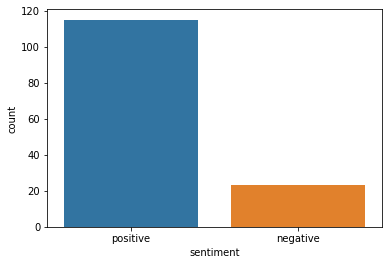

In [22]:
sns.countplot(data['sentiment'])

In [23]:
#Getting positive tweets 
positive_tweet=data[data['sentiment']=='positive']['clean_tweet']
#Get the negative tweets
negative_tweet=data[data['sentiment']=='negative']['clean_tweet']

In [24]:
#Convert into a list
positive_tweet_list=positive_tweet.tolist()
negative_tweet_list=negative_tweet.tolist()

In [25]:
#Convert to tokens
for line in positive_tweet_list:
  print(line)
  for token in line.split():
    print(token)

onlin learn nben troy njue host prof washington okeyo vice chair manag univers africa help us put thing perspect join us newscheck
onlin
learn
nben
troy
njue
host
prof
washington
okeyo
vice
chair
manag
univers
africa
help
us
put
thing
perspect
join
us
newscheck
virtual school back jinja citi educ hub academ year search facil learn never stop horizon intern school jinja got cover enrol
virtual
school
back
jinja
citi
educ
hub
academ
year
search
facil
learn
never
stop
horizon
intern
school
jinja
got
cover
enrol
best onlin learn research carriculum
best
onlin
learn
research
carriculum
check cours tinyml read infer microcontrol tensorflow lite interest machin learn
check
cours
tinyml
read
infer
microcontrol
tensorflow
lite
interest
machin
learn
want learn genr well studi win exampl check dope onlin workshop one best digit film learn platform
want
learn
genr
well
studi
win
exampl
check
dope
onlin
workshop
one
best
digit
film
learn
platform
pedalafrica onlin nit design onlin cours ground acad

In [26]:
pos_token=[token for line in positive_tweet_list for token in line.split()]
neg_token=[token for line in negative_tweet_list for token in line.split()]

In [27]:
#keywords using collections get commonest keyword
from collections import Counter
def get_token(docx, num=30):
  word_tokens = Counter(docx)
  most_common = word_tokens.most_common(num)
  result = dict(most_common)
  return result

In [28]:
#Most positive words
most_positive=get_token(pos_token)
most_positive

{'access': 15,
 'africa': 7,
 'amp': 21,
 'children': 8,
 'class': 8,
 'continu': 8,
 'countri': 11,
 'cours': 7,
 'data': 8,
 'digit': 33,
 'educ': 23,
 'learn': 135,
 'need': 15,
 'not': 9,
 'onlin': 61,
 'parent': 9,
 'pedalafrica': 7,
 'platform': 10,
 'school': 12,
 'student': 22,
 'studi': 8,
 'today': 8,
 'univers': 13,
 'us': 10,
 'use': 9,
 'well': 7,
 'work': 10,
 'xc': 10,
 'xe': 18,
 'xf': 80}

In [29]:
most_negative=get_token(neg_token)
most_negative

{'access': 3,
 'amp': 3,
 'arab': 4,
 'base': 4,
 'behind': 4,
 'center': 6,
 'connect': 3,
 'data': 3,
 'digit': 4,
 'educ': 5,
 'get': 3,
 'islam': 4,
 'learn': 31,
 'learnarab': 4,
 'learnarabiclanguag': 4,
 'learnquranonlin': 4,
 'need': 5,
 'one': 4,
 'onlin': 22,
 'onlineschool': 4,
 'platform': 3,
 'school': 11,
 'share': 8,
 'student': 5,
 'support': 3,
 'tax': 3,
 'teacher': 3,
 'technolog': 3,
 'twahirah': 4,
 'twahirahislamiccent': 4}

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

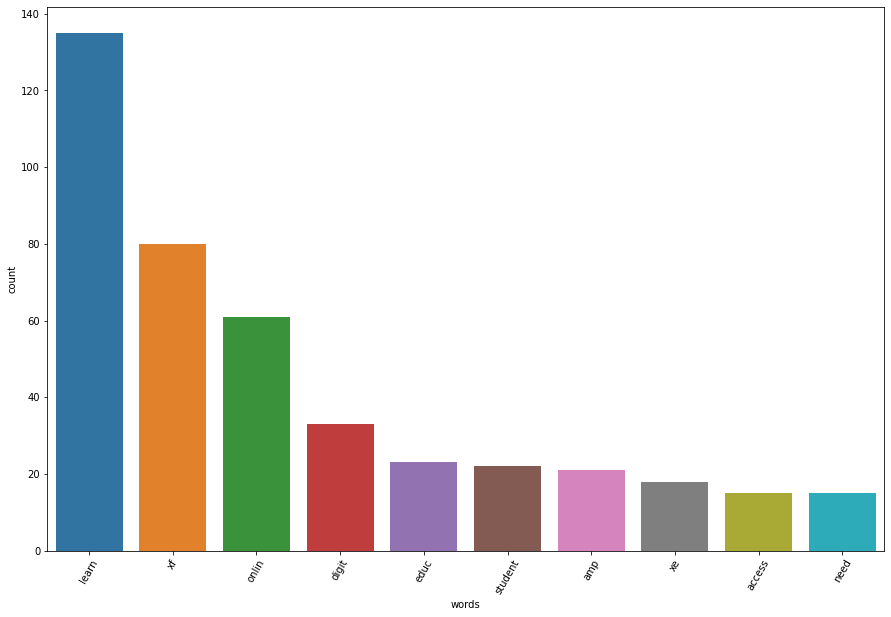

In [30]:
#Convert to df and plot
pos_df=pd.DataFrame(most_positive.items(), columns=['words','count'])
plt.figure(figsize=(15,10))
sns.barplot(x='words',y='count', data=pos_df.head(10))
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

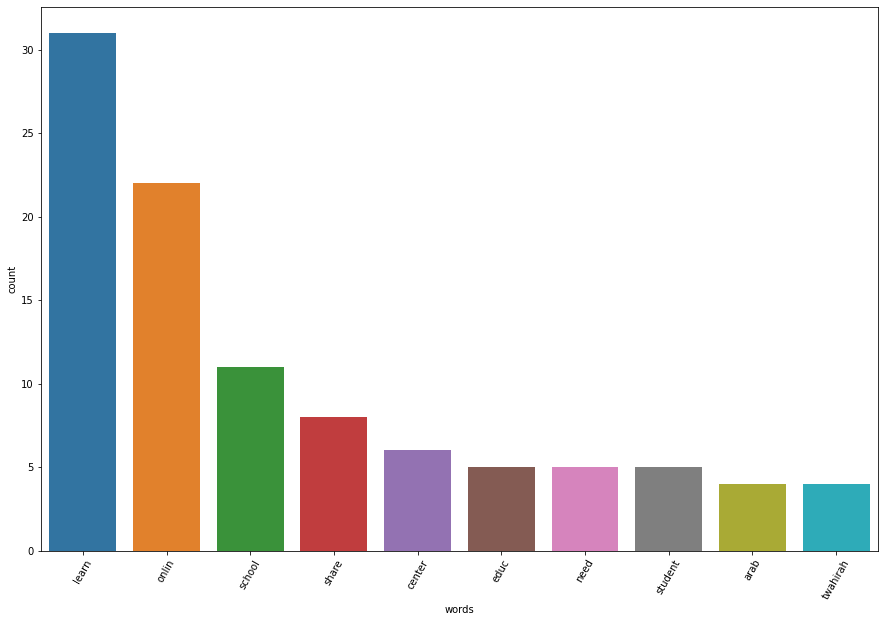

In [31]:
#Make to df
neg_df=pd.DataFrame(most_negative.items(), columns=['words','count'])
plt.figure(figsize=(15,10))
sns.barplot(x='words',y='count', data=neg_df.head(10))
plt.xticks(rotation=60)

In [32]:
# visulize using word cloud
from wordcloud import WordCloud
def plot_wordcloud(docx):
  mywordcloud = WordCloud().generate(docx)
  plt.imshow(mywordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

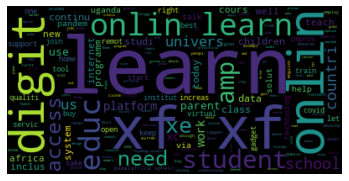

In [33]:
#Visulize the positive tokens using wordcloud
pos_docx=' '.join(pos_token)
plot_wordcloud(pos_docx)

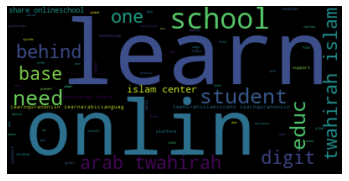

In [34]:
#Visulize negative tokens using wordcloud
neg_docx=' '.join(neg_token)
plot_wordcloud(neg_docx)

In [35]:
#Label encode the class column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['class'] = le.fit_transform(data['sentiment'])
data.sample(4)

,tweets,user,location,id,date,source,likes,clean_tweet,sentiment,class
50,b'Taking online classes to get new certificati...,bscrw,"Kigali, Rwanda",1425134771760402437,2021-08-10 16:39:41,Twitter for iPhone,1,take onlin class get new certif go along way b...,positive,1
90,b'RT gnsec_net: Join our free #digital #traini...,EACREEE4EA,"Kampala, Uganda",1426200153220911115,2021-08-13 15:13:08,IFTTT,0,rt gnsecnet join free digit train program sust...,positive,1
139,b'Policy must be amended on E-learning and the...,dmezwenkka,"Kampala, Uganda",1425036451243347975,2021-08-10 10:09:00,Twitter for Android,7,polici must amend learn internet infrastructur...,positive,1
1,"b""Virtual school is back at Jinja city's educa...",felixadvise,"Jinja, Uganda",1427539081316216853,2021-08-17 07:53:34,Twitter Web App,6,virtual school back jinja citi educ hub academ...,positive,1


In [36]:
#Label encode the class column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['class'] = le.fit_transform(data['sentiment'])
data.sample(10)

,tweets,user,location,id,date,source,likes,clean_tweet,sentiment,class
47,"b""There's only one way that education continue...",schools_ug,"Kampala, Uganda",1425400482311331845,2021-08-11 10:15:32,Twitter for Android,3,one way educ continu amidst pandem onlin not g...,negative,0
139,b'Policy must be amended on E-learning and the...,dmezwenkka,"Kampala, Uganda",1425036451243347975,2021-08-10 10:09:00,Twitter for Android,7,polici must amend learn internet infrastructur...,positive,1
65,b'Electric engineering students online learnin...,RoticHillary,"Nairobi, Kenya",1424808458583482368,2021-08-09 19:03:02,Twitter for Android,1,electr engin student onlin learn,positive,1
125,"b""@AloysiousKats @CanaryMugume @kizzabesigye1 ...",m_jodrah,kasese,1426080382999425024,2021-08-13 07:17:13,Twitter for Android,1,radio part learn well never cross busega bwais...,positive,1
82,b'Akello Launches Digital Learning Opportuniti...,rookello,Kenya,1427225551387901955,2021-08-16 11:07:42,Twitter Web App,0,akello launch digit learn opportun across africa,positive,1
75,"b""Access to remote learning facilities is not ...",anan_prisca,"Kampala, Uganda",1427506234958262292,2021-08-17 05:43:02,Twitter for Android,0,access remot learn facil not option human righ...,positive,1
59,b'@ntvuganda Online learning is trash. Learnin...,fredjjunju,Kampala Uganda,1425014740380704770,2021-08-10 08:42:44,Twitter for Android,2,onlin learn trash learn encompass someon send ...,positive,1
99,"b""Ironically, if Pakistan wants to improve its...",OsmSiddiqi,Kenya,1425721586234138624,2021-08-12 07:31:29,Twitter Web App,4,iron pakistan want improv oppress tactic digit...,positive,1
0,b'ONLINE LEARNING |\nBen Troy Njue hosts Prof....,KBCTelevision,"Nairobi, Kenya",1427541371418783761,2021-08-17 08:02:40,TweetDeck,0,onlin learn nben troy njue host prof washingto...,positive,1
37,"b""As a parent how often do you engage with you...",FunzoPlatform,"Nairobi, Kenya",1425713728503353344,2021-08-12 07:00:16,Twitter Web App,0,parent often engag child learn onlin platform ...,positive,1


In [37]:
data.to_csv ('remote_clean.csv')

In [38]:
df = pd.read_csv('/content/remote_clean.csv')
df.head()

,Unnamed: 0,tweets,user,location,id,date,source,likes,clean_tweet,sentiment,class
0,0,b'ONLINE LEARNING |\nBen Troy Njue hosts Prof....,KBCTelevision,"Nairobi, Kenya",1427541371418783761,2021-08-17 08:02:40,TweetDeck,0,onlin learn nben troy njue host prof washingto...,positive,1
1,1,"b""Virtual school is back at Jinja city's educa...",felixadvise,"Jinja, Uganda",1427539081316216853,2021-08-17 07:53:34,Twitter Web App,6,virtual school back jinja citi educ hub academ...,positive,1
2,2,"b""@KBCChannel1 @ManagementUNI the best in onl...",Daisywanga2,"Nairobi, Kenya",1427533647549247494,2021-08-17 07:31:58,Twitter for Android,2,best onlin learn research carriculum,positive,1
3,3,b'Check out this course on TinyML (https://t.c...,VickTheGeek,"Nairobi, Kenya",1427516048178393106,2021-08-17 06:22:02,Twitter for Android,0,check cours tinyml read infer microcontrol ten...,positive,1
4,4,b'Want to learn more about genre as well as st...,WANTMofficial,Kenya,1427496748075954208,2021-08-17 05:05:21,Twitter Web App,1,want learn genr well studi win exampl check do...,positive,1


In [39]:
df.shape

(138, 11)